## WHICH COMBINATIONS OF GENRES MAY MAXIMIZE MOVIES' SALE ? 🚀👹 👺

<img src="https://help.nflxext.com/43e0db2f-fea0-4308-bfb9-09f2a88f6ee4_what_is_netflix_1_en.png" width="700" height="350">

### I HAVE ALREADY INSPECTED, CLEANED AND EXPLORED (EDA) DATA IN PREVIOUS NOTEBOOK, PLS HAVE A LOOK 🛫 🛬 [HERE](https://www.kaggle.com/nguyenngocphung/grossing-movies-basic-eda-visualization-apriori) 

### AIM OF THIS NOTEBOOK 🌋
- I observed from previous analysis that there is no single genre that can generate comparatively higher average sale.
- My question mark is that, whether there are some combinations of genres that can possibly drive higher sale compared to others ? If we can answer this question, film directors can consider to make movies with these combinations if sale is their priority 🐉
- My process of thinking is simple as follow: 
    - My direct logic is to list out all possible combinations of 21 different genres, but that will be in total (2^21 -1) possibilities (-1 for set of null), then calculate the median World sale of those movies having those combinations (we inspected that world sale is highly skewed, hence median is more logical as it is less sensitive to outliers) .However, that is a lot of combinations :), not to mention there are some combinations that may even dont exist in our dataset. 
    - In order to reduce the amount of combinations and to make sure those combinations exist, I narrow down list of combinations by Apriori algorithm with min_support = 0.05
    - The drawback of this way is that, there are some combinations of genres that dont appear often in the dataset, but drive considerably high amount of sale, but have been excluded by Apriori. 

#### Hope U enjoy this notebook, any Discussion questions, pls tell me in the cmt section 🍣

### Import Packages and Basic Data Cleaning 🎎

In [123]:
# Main Packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Other Packages 
import ast
# In case we want to ignore the warning parts @-@
import warnings
warnings.filterwarnings("ignore")

# Import Dataset 
data= pd.read_csv('Highest Holywood Grossing Movies.csv')
# We drop any duplicate records 🦘
data.drop_duplicates(inplace=True)
# We observe that the column 'Unnamed: 0' is unnecessary, hence we drop the column 🦌 
data.drop('Unnamed: 0', axis=1,inplace=True)
# I want to replace values of Movie Runtime to a numeric values of hours 🐕 
runtime= data['Movie Runtime'].str.split(expand=True).iloc[:,[0,2]]
runtime[2].fillna(0,inplace=True)
runtime= runtime.astype('int64')
runtime['hour']= runtime[0]+runtime[2]/60
data['Movie Runtime']= runtime['hour']
# We should change the type of Release Date into Datetime 🐩
data['Release Date']= pd.to_datetime(data['Release Date'])
# I want to replace some of column names 🐕
data.rename(columns={'Domestic Sales (in $)':'Domestic Sales','International Sales (in $)':'International Sales',
                     'World Sales (in $)':'World Sales'}, inplace=True)
# I want to change the unit of 'Domestic Sales (in $)', 'International Sales (in $)','World Sales (in $)'
# into unit of 1 million dollars 🐑
data[['Domestic Sales','International Sales','World Sales']]= data[['Domestic Sales',
                                            'International Sales','World Sales']].apply(lambda x: x/(10**6))
# The Genre column is appeared as a string of list, we have to change this 🦩
data['Genre']= data['Genre'].apply(lambda x: ast.literal_eval(x))
# Create list for column names of different data types (numerical,categorical, datetime)
num_col= ['Domestic Sales', 'International Sales', 'World Sales','Movie Runtime']
cat_col= ['Title','Movie Info', 'Distributor','License','Genre']
date_col='Release Date'

# New dataset is :
data.head(3)

,Title,Movie Info,Distributor,Release Date,Domestic Sales,International Sales,World Sales,Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936.662225,1132.859475,2069.521700,"[Action, Adventure, Sci-Fi]",2.300000,PG-13
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858.373000,1939.128328,2797.501328,"[Action, Adventure, Drama, Sci-Fi]",3.016667,PG-13
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2009-12-16,760.507625,2086.738578,2847.246203,"[Action, Adventure, Fantasy, Sci-Fi]",2.700000,PG-13


- **Data Formats**
     - Numeric variables (Discete): 'Domestic Sales', 'International Sales','World Sales'
     - Numeric variables (Continuous): 'Movie Runtime'
     - Categorical variables (Nominal):  'Title', 'Movie Info', 'Distributor', 'Genre', 'License'
     - Categorical variables (Datetime): 'Release Date'

### Preparation 🍨

In [124]:
#List of all Genre
Genre= []
for i in range(data.shape[0]):
    Genre.extend(data.loc[i,'Genre'])
Genre= pd.Series(Genre).unique()
Genre

array(['Action', 'Adventure', 'Sci-Fi', 'Drama', 'Fantasy', 'Romance',
       'Animation', 'Comedy', 'Family', 'Musical', 'Crime', 'Thriller',
       'War', 'Mystery', 'Biography', 'Horror', 'Sport', 'Music',
       'History', 'Western', 'Documentary'], dtype=object)

- There are, in total 21 different types of movie's genre. 

In [125]:
genre_group= []
for i in range(data.shape[0]):
    genre_group.append(tuple(data.loc[i,'Genre']))
genre_group[:3]

[('Action', 'Adventure', 'Sci-Fi'),
 ('Action', 'Adventure', 'Drama', 'Sci-Fi'),
 ('Action', 'Adventure', 'Fantasy', 'Sci-Fi')]

### Apply Apriori Algorithm 🍝

In [126]:
from efficient_apriori import apriori
itemsets, rules = apriori(genre_group, min_support=0.05, min_confidence=0)

In [127]:
# All combinations which appear at least 5% of all observations 🍉
display(itemsets)
for i in range(2,6):
    print(f'num of combination of {i} genres:', len(itemsets[i]))

{1: {('Action',): 396,
  ('Adventure',): 432,
  ('Sci-Fi',): 228,
  ('Drama',): 300,
  ('Fantasy',): 227,
  ('Romance',): 142,
  ('Animation',): 140,
  ('Comedy',): 399,
  ('Family',): 227,
  ('Musical',): 51,
  ('Crime',): 136,
  ('Thriller',): 230,
  ('Mystery',): 87},
 2: {('Action', 'Adventure'): 248,
  ('Action', 'Comedy'): 89,
  ('Action', 'Crime'): 72,
  ('Action', 'Drama'): 67,
  ('Action', 'Fantasy'): 83,
  ('Action', 'Sci-Fi'): 180,
  ('Action', 'Thriller'): 155,
  ('Adventure', 'Animation'): 133,
  ('Adventure', 'Comedy'): 191,
  ('Adventure', 'Drama'): 72,
  ('Adventure', 'Family'): 188,
  ('Adventure', 'Fantasy'): 186,
  ('Adventure', 'Sci-Fi'): 176,
  ('Adventure', 'Thriller'): 72,
  ('Animation', 'Comedy'): 125,
  ('Animation', 'Family'): 136,
  ('Animation', 'Fantasy'): 84,
  ('Comedy', 'Crime'): 61,
  ('Comedy', 'Drama'): 87,
  ('Comedy', 'Family'): 180,
  ('Comedy', 'Fantasy'): 122,
  ('Comedy', 'Romance'): 93,
  ('Comedy', 'Sci-Fi'): 63,
  ('Crime', 'Drama'): 47,
  (

num of combination of 2 genres: 34
num of combination of 3 genres: 18
num of combination of 4 genres: 5
num of combination of 5 genres: 1


- We have no interest in combination of only 1 genre, hence we will inspect combination of 2 or more genres, so that is 58 combinations. 

### Lets inspect the results 🌞

#### Table of Summary 🍋

In [128]:
# We need to define a function to filter data of a certain combination of genre 🍇
def data_genre(c):   # tuple of combination
    c= list(c)            # turn to list
    mask= data['Genre'].apply(lambda x: set(c) <= set(x)) # check whether the combination contained in genres of movie
    return data[mask] 

list_genre_combi=[]
for i in range(2,6):
    list_genre_combi.append(pd.DataFrame({'Genre Combination':list(itemsets[i]),
                            'Frequency':list(itemsets[i].values())}))
genre_combination= pd.concat(list_genre_combi, axis=0)
genre_combination['Median_Sale']= genre_combination['Genre Combination'].apply(lambda x: data_genre(x)['World Sales'].median())
genre_combination.sort_values('Median_Sale',ascending=False,inplace=True)
genre_combination.head(10)

,Genre Combination,Frequency,Median_Sale
2,"(Action, Adventure, Sci-Fi)",143,538.375067
1,"(Action, Adventure, Fantasy)",74,484.160585
12,"(Adventure, Sci-Fi)",176,473.164533
5,"(Action, Sci-Fi)",180,463.530510
0,"(Action, Adventure)",248,458.469320
11,"(Adventure, Fantasy)",186,446.303761
4,"(Action, Fantasy)",83,443.280904
6,"(Adventure, Animation, Comedy)",120,408.046450
3,"(Action, Adventure, Thriller)",68,407.941603
13,"(Adventure, Thriller)",72,407.941603


#### Histogram of Average sale by Combination of Genres 🐉

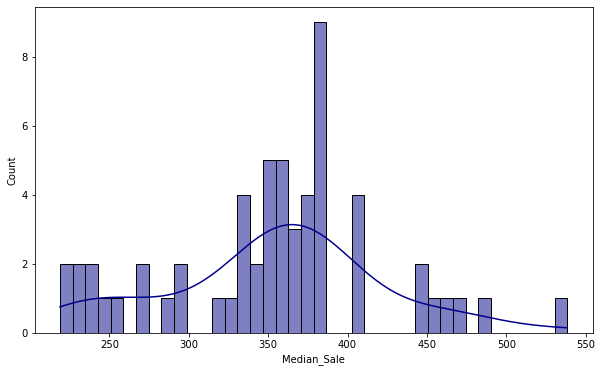

In [129]:
fig, ax= plt.subplots(figsize=(10,6))
ax= sns.histplot(x='Median_Sale',data=genre_combination, bins=40,
               color='darkblue', edgecolor='black',kde=True)

- Interesting, so we do have some combinations of genres that produce outstanding high sale, we use 420 as the threshold, lets see which combinations produce high sale 🌏

#### Bar Chart of Average sale by Combination of Genres 🌵

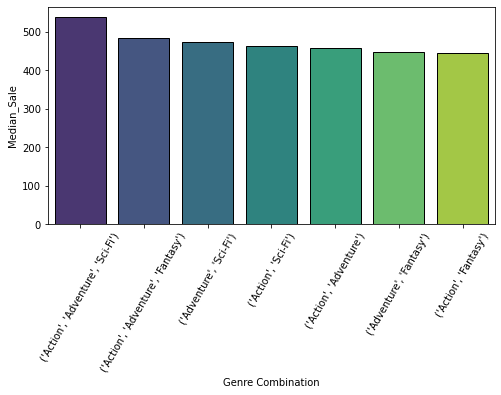

In [100]:
fig, ax= plt.subplots(figsize=(8,4))
mask= genre_combination['Median_Sale']>420
sns.barplot(x='Genre Combination',y='Median_Sale', data=genre_combination[mask], palette='viridis',
            edgecolor='black',ax=ax)
ax.tick_params(axis='x', labelrotation=60)

- Most combination of Actions, Adventure, Fantasy and Sci-Fi produce comparatively high sale. 

#### More Validation using Histograms 🍂

- I still suspected that whether these combination of genres, in general, really can produce higher sale 🌚

In [81]:
top_genre_combi= genre_combination[mask]['Genre Combination'].tolist()
top_genre_combi

[('Action', 'Adventure', 'Sci-Fi'),
 ('Action', 'Adventure', 'Fantasy'),
 ('Adventure', 'Sci-Fi'),
 ('Action', 'Sci-Fi'),
 ('Action', 'Adventure'),
 ('Adventure', 'Fantasy'),
 ('Action', 'Fantasy')]

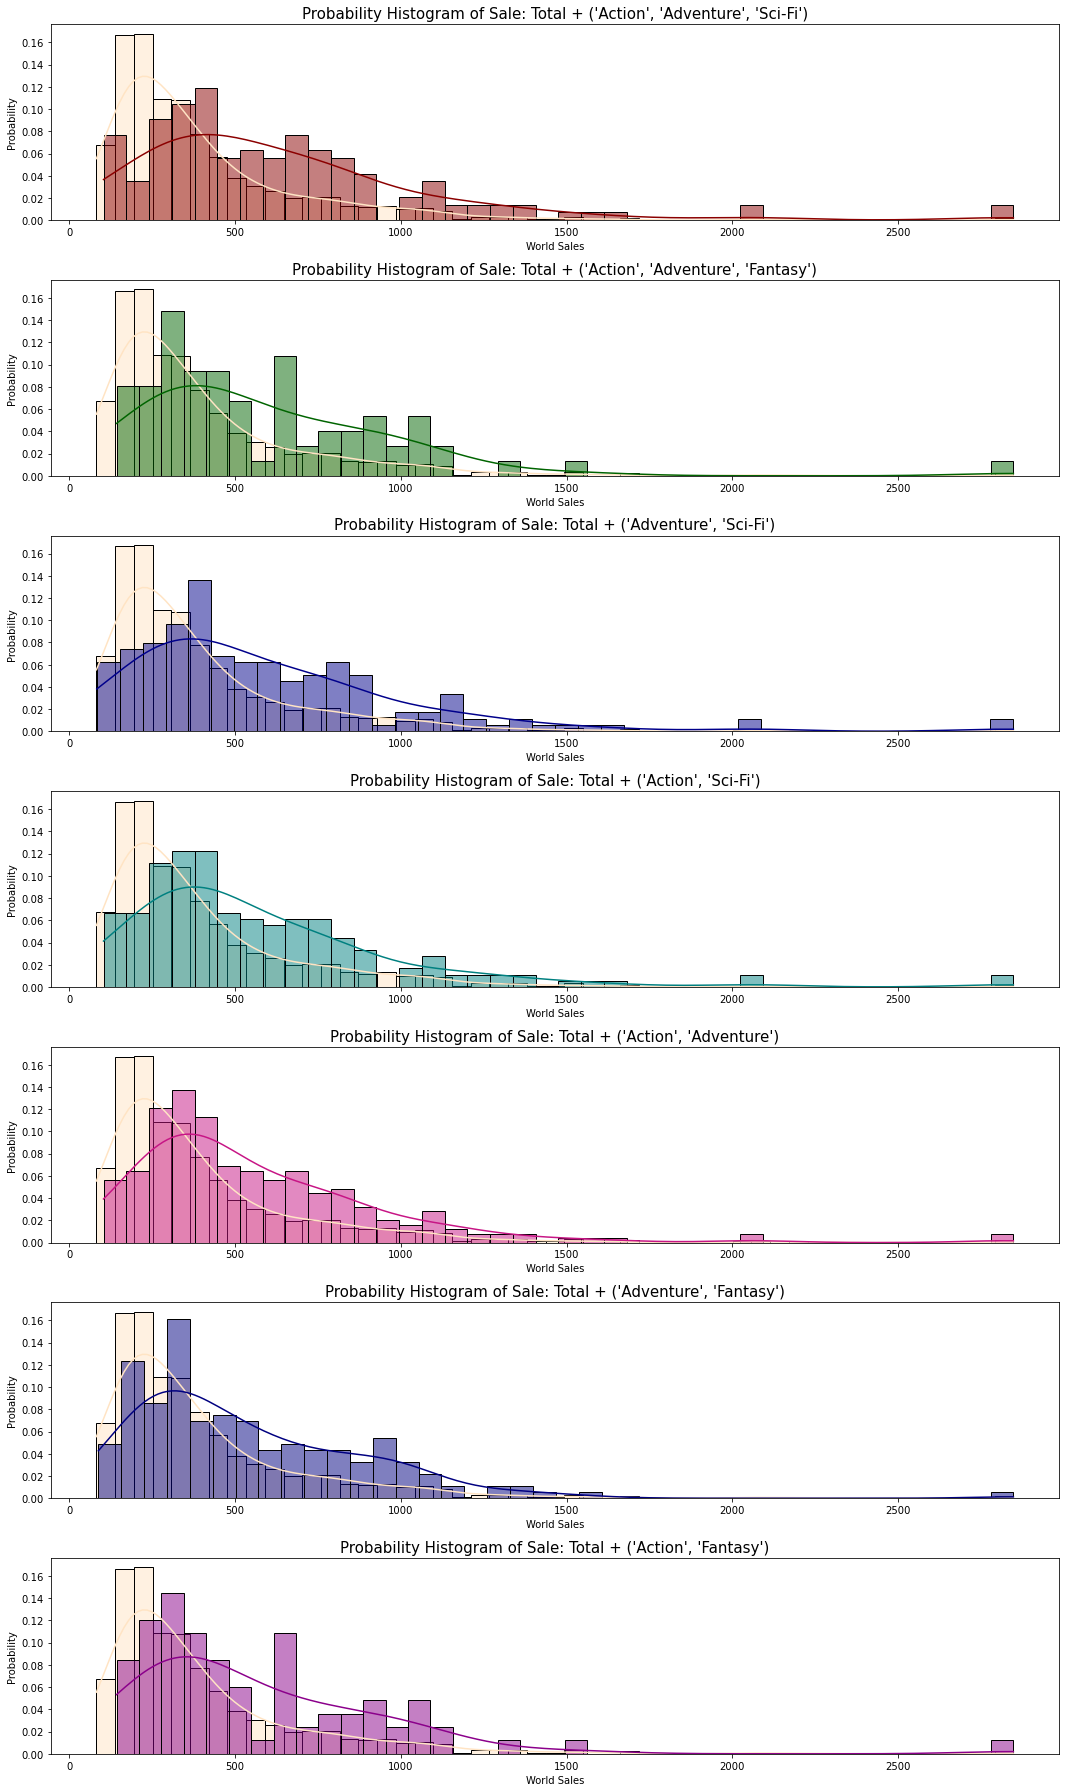

In [122]:
fig,ax= plt.subplots(nrows=7, figsize=(15,25))
color= ['darkred', 'darkgreen', 'darkblue', 'teal', 'mediumvioletred', 'navy', 'darkmagenta']
for i in range(len(top_genre_combi)):
    ax[i].set_title(f'Probability Histogram of Sale: Total + {top_genre_combi[i]}',fontsize=15)
    sns.histplot(x='World Sales', data=data, color='bisque',kde=True,stat = "probability", ax=ax[i])
    df= data_genre(top_genre_combi[i])
    sns.histplot(x='World Sales', data=df, color=color[i],bins=40,kde=True,stat = "probability",ax=ax[i])
fig.tight_layout();

- So you can observe that movies with these combination of genres are more likely to produce high sale 🦚

### HOPE U SEE THIS NOTEBOOK INTERESTING, IF U SEE THERE IS ANOTHER WAY TO REFINE MY WORK, I'D LOVE TO KNOW !!! 😎